In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Dataset

df = pd.read_csv(r"D:\ExcelR\Data Science\Assignments\Logistic Regression\bank-full.csv", sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.drop(columns=['age','job','marital','education','default','contact','day','month'], inplace=True)
df.head()

,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,2143,yes,no,261,1,-1,0,unknown,no
1,29,yes,no,151,1,-1,0,unknown,no
2,2,yes,yes,76,1,-1,0,unknown,no
3,1506,yes,no,92,1,-1,0,unknown,no
4,1,no,no,198,1,-1,0,unknown,no


In [4]:
df.isna().sum()

balance     0
housing     0
loan        0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
y           0
dtype: int64

In [5]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [6]:
df['housing'] = df['housing'].replace({'yes': 1, 'no': 0})

In [7]:
df['loan'] = df['loan'].replace({'yes':1, 'no':0})

In [8]:
df['y'] = df['y'].replace({'yes' : 1, 'no' : 0})

In [9]:
df = pd.get_dummies(data=df,columns=['poutcome'])
df.head()

,balance,housing,loan,duration,campaign,pdays,previous,y,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,1,0,261,1,-1,0,0,0,0,0,1
1,29,1,0,151,1,-1,0,0,0,0,0,1
2,2,1,1,76,1,-1,0,0,0,0,0,1
3,1506,1,0,92,1,-1,0,0,0,0,0,1
4,1,0,0,198,1,-1,0,0,0,0,0,1


In [10]:
df = df[[col for col in df.columns if col != df.columns[7]] + [df.columns[7]]]
df.head()

,balance,housing,loan,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,2143,1,0,261,1,-1,0,0,0,0,1,0
1,29,1,0,151,1,-1,0,0,0,0,1,0
2,2,1,1,76,1,-1,0,0,0,0,1,0
3,1506,1,0,92,1,-1,0,0,0,0,1,0
4,1,0,0,198,1,-1,0,0,0,0,1,0


In [11]:
df.isna().sum()

balance             0
housing             0
loan                0
duration            0
campaign            0
pdays               0
previous            0
poutcome_failure    0
poutcome_other      0
poutcome_success    0
poutcome_unknown    0
y                   0
dtype: int64

In [12]:
#Split data into Training and Testing

from sklearn.model_selection import train_test_split

In [13]:
x = df.iloc[:,:11]
x

,balance,housing,loan,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,1,0,261,1,-1,0,0,0,0,1
1,29,1,0,151,1,-1,0,0,0,0,1
2,2,1,1,76,1,-1,0,0,0,0,1
3,1506,1,0,92,1,-1,0,0,0,0,1
4,1,0,0,198,1,-1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
45206,825,0,0,977,3,-1,0,0,0,0,1
45207,1729,0,0,456,2,-1,0,0,0,0,1
45208,5715,0,0,1127,5,184,3,0,0,1,0
45209,668,0,0,508,4,-1,0,0,0,0,1


In [14]:
y = df['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=0.75, random_state=1)

In [16]:
#Model Building

from sklearn.linear_model import LogisticRegression

In [17]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
#Prediction

ypred = lg.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
print(len(xtest))
print(len(ypred))

11303
11303


In [20]:
print('Actual Y : ', ytest[:25].values)
print('Predicted Y : ', ypred[:25])

Actual Y :  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Y :  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
#Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9998
           1       0.62      0.24      0.35      1305

    accuracy                           0.90     11303
   macro avg       0.76      0.61      0.65     11303
weighted avg       0.87      0.90      0.87     11303



In [23]:
confusion_matrix(ytest,ypred)

array([[9801,  197],
       [ 989,  316]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted Values')

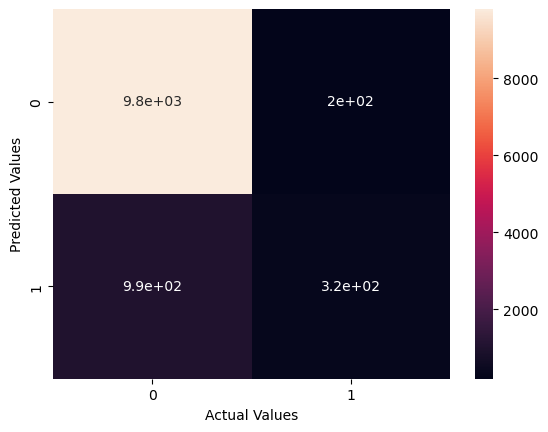

In [24]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [25]:
#Threshold Selection

proba = lg.predict_proba(xtest)[:,1]
proba

array([0.02969728, 0.08786011, 0.22035257, ..., 0.14016262, 0.72905848,
       0.00799816])

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score

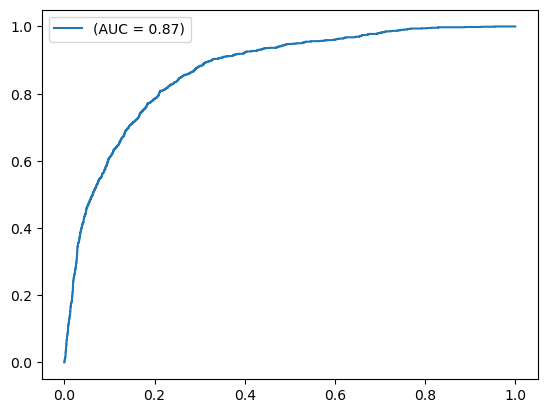

In [27]:
auc = roc_auc_score(ytest,proba)

fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [28]:
auc

0.8697629181008616

In [29]:
print(len(threshold))
threshold

1767


array([1.99997042e+00, 9.99970420e-01, 9.99970322e-01, ...,
       1.08843232e-02, 1.08828371e-02, 1.33231355e-04])

In [30]:
accuracy = []
for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    
final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
final_threshold.columns = ['Threshold','Accuracy']

In [31]:
final_threshold.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
347,0.410245,0.898876
342,0.413560,0.898523
339,0.414446,0.898523
338,0.414781,0.898523
348,0.409181,0.898523
...,...,...
1762,0.013188,0.177121
1763,0.013183,0.177033
1764,0.010884,0.155534
1765,0.010883,0.155445


In [32]:
from sklearn.preprocessing import binarize

In [33]:
y = binarize([proba], threshold=0.442068)[0]
y

array([0., 0., 0., ..., 0., 1., 0.])

In [34]:
print(classification_report(ytest,y))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9998
           1       0.60      0.29      0.39      1305

    accuracy                           0.90     11303
   macro avg       0.75      0.63      0.67     11303
weighted avg       0.88      0.90      0.88     11303

